La solución a la ecuación obtenida para el problema de la ecuación del calor en una placa bidimensional es:

$$ T(x,y,t) = \sum_{n,m} C_{nm} \sin\left(\frac{n\pi x}{a}\right)\sin\left(\frac{m\pi y}{b}\right) e^{-\alpha{\lambda_{nm}} t}$$

donde:

$$C_{nm} = \frac{4}{ab} \int_0^b \int_0^a f(x,y) \sin\left(\frac{n\pi x}{a}\right) \sin\left(\frac{m\pi y}{b}\right)\,dx\,dy $$

y:

$$\lambda_{nm} = \left(\frac{n\pi}{a}\right)^2 + \left(\frac{m\pi}{b}\right)^2$$

y $f(x,y) = T(x,y,0)$ es la distribución inicial de la temperatura en la placa.

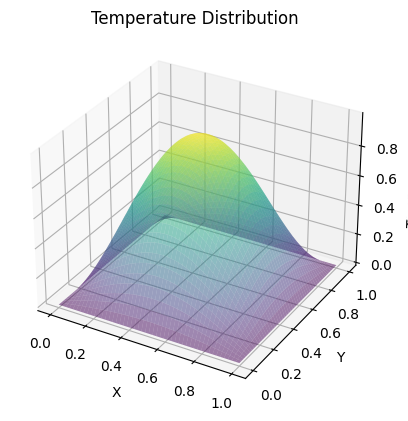

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir funciones
def initial_temperature_distribution(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def calculate_C_nm(n, m, a, b, f, num_points=100):
    x = np.linspace(0, a, num_points)
    y = np.linspace(0, b, num_points)
    X, Y = np.meshgrid(x, y)
    dx = a / (num_points - 1)
    dy = b / (num_points - 1)

    integrand = f(X, Y) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)
    integral = np.trapz(np.trapz(integrand, dx=dx, axis=0), dx=dy, axis=0)

    return (4 / (a * b)) * integral

def calculate_lambda_nm(n, m, a, b):
    return ((n * np.pi / a) ** 2) + ((m * np.pi / b) ** 2)

def calculate_temperature(x, y, t, a, b, alpha, C_nm_func, lambda_nm_func, f):
    temperature = 0
    for n in range(1, 10):  # Rango de suma, puedes ajustarlo según tu necesidad
        for m in range(1, 10):
            C_nm = C_nm_func(n, m, a, b, f)
            lambda_nm = lambda_nm_func(n, m, a, b)
            temperature += C_nm * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b) * np.exp(-alpha * lambda_nm * t)
    return temperature



a = 2
b = 2



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)

X, Y = np.meshgrid(x, y)

def generate_data(frame):
    Z = np.sin(np.sqrt(X**2 + Y**2 + frame))
    return Z

surf = [ax.plot_surface(X, Y, generate_data(0), cmap='plasma')]

def update(frame, surf, ax):
    ax.clear()
    ax.set_zlim(-2, 2)
    ax.set_title('Frame {}'.format(frame))
    surf[0] = ax.plot_surface(X, Y, generate_data(frame), cmap='plasma')
    return surf

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100), fargs=(surf, ax), interval=50)

# Save as a GIF using PillowWriter
writer = PillowWriter(fps=20)
ani.save('animation.gif', writer=writer)



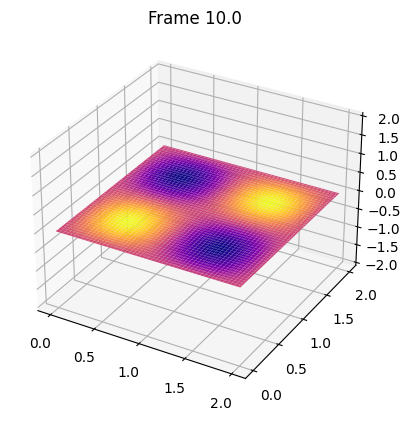

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Define functions for temperature calculation
def initial_temperature_distribution(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def calculate_C_nm(n, m, a, b, f, num_points=100):
    x = np.linspace(0, a, num_points)
    y = np.linspace(0, b, num_points)
    X, Y = np.meshgrid(x, y)
    dx = a / (num_points - 1)
    dy = b / (num_points - 1)

    integrand = f(X, Y) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)
    integral = np.trapz(np.trapz(integrand, dx=dx, axis=0), dx=dy, axis=0)

    return (4 / (a * b)) * integral

def calculate_lambda_nm(n, m, a, b):
    return ((n * np.pi / a) ** 2) + ((m * np.pi / b) ** 2)

def calculate_temperature(x, y, t, a, b, alpha, C_nm_func, lambda_nm_func, f):
    temperature = 0
    for n in range(1, 10):  # Range of summation, adjust as needed
        for m in range(1, 10):
            C_nm = C_nm_func(n, m, a, b, f)
            lambda_nm = lambda_nm_func(n, m, a, b)
            temperature += C_nm * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b) * np.exp(-alpha * lambda_nm * t)
    return temperature

# Parameters
a = 2
b = 2
alpha = 0.1

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Initial temperature distribution
Z = initial_temperature_distribution(X, Y)
surf = [ax.plot_surface(X, Y, Z, cmap='plasma')]

# Update function for animation
def update(frame, surf, ax):
    ax.clear()
    ax.set_zlim(-2, 2)
    ax.set_title('Frame {}'.format(frame))
    Z = calculate_temperature(X, Y, frame, a, b, alpha, calculate_C_nm, calculate_lambda_nm, initial_temperature_distribution)
    surf[0] = ax.plot_surface(X, Y, Z, cmap='plasma')
    return surf

# Animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 200), fargs=(surf, ax), interval=200)

# Save as a GIF using PillowWriter
writer = PillowWriter(fps=20)
ani.save('animation.gif', writer=writer)

plt.show()


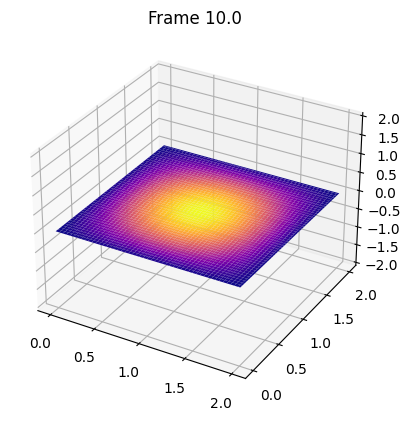

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Define functions
def initial_temperature_distribution(x, y, a, b):
    x0 = a / 2
    y0 = b / 2
    sigma_x = a / 700  # Adjust the standard deviation to control the spread of the Gaussian
    sigma_y = b / 700
    return 1/(sigma_x*sigma_y) * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

def calculate_C_nm(n, m, a, b, f, num_points=100):
    x = np.linspace(0, a, num_points)
    y = np.linspace(0, b, num_points)
    X, Y = np.meshgrid(x, y)
    dx = a / (num_points - 1)
    dy = b / (num_points - 1)

    integrand = f(X, Y, a, b) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)
    integral = np.trapz(np.trapz(integrand, dx=dx, axis=0), dx=dy, axis=0)

    return (4 / (a * b)) * integral

def calculate_lambda_nm(n, m, a, b):
    return ((n * np.pi / a) ** 2) + ((m * np.pi / b) ** 2)

def calculate_temperature(x, y, t, a, b, alpha, C_nm_func, lambda_nm_func, f):
    temperature = 0
    for n in range(1, 10):  # Sum range, adjust as needed
        for m in range(1, 10):
            C_nm = C_nm_func(n, m, a, b, f)
            lambda_nm = lambda_nm_func(n, m, a, b)
            temperature += C_nm * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b) * np.exp(-alpha * lambda_nm * t)
    return temperature

a = 2
b = 2
alpha = 0.6

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y, a, b)

def generate_data(frame):
    Z = calculate_temperature(X, Y, frame, a, b, alpha, calculate_C_nm, calculate_lambda_nm, initial_temperature_distribution)
    return Z

surf = [ax.plot_surface(X, Y, generate_data(0), cmap='plasma')]

def update(frame, surf, ax):
    ax.clear()
    ax.set_zlim(-2, 2)
    ax.set_title('Frame {}'.format(frame))
    surf[0] = ax.plot_surface(X, Y, generate_data(frame), cmap='plasma')
    return surf

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100), fargs=(surf, ax), interval=100)

# Save as a GIF using PillowWriter
writer = PillowWriter(fps=5)
ani.save('animation.gif', writer=writer)

plt.show()


FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

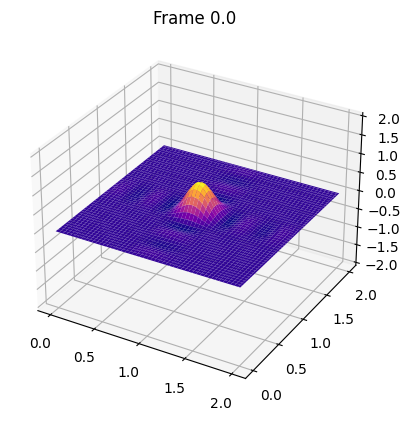

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Define functions
def initial_temperature_distribution(x, y, a, b):
    x0 = a / 2
    y0 = b / 2
    sigma_x = a / 20  # Decrease sigma for a spikey Gaussian
    sigma_y = b / 20
    return np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

def calculate_C_nm(n, m, a, b, f, num_points=100):
    x = np.linspace(0, a, num_points)
    y = np.linspace(0, b, num_points)
    X, Y = np.meshgrid(x, y)
    dx = a / (num_points - 1)
    dy = b / (num_points - 1)

    integrand = f(X, Y, a, b) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)
    integral = np.trapz(np.trapz(integrand, dx=dx, axis=0), dx=dy, axis=0)

    return (4 / (a * b)) * integral

def calculate_lambda_nm(n, m, a, b):
    return ((n * np.pi / a) ** 2) + ((m * np.pi / b) ** 2)

def calculate_temperature(x, y, t, a, b, alpha, C_nm_func, lambda_nm_func, f):
    temperature = 0
    for n in range(1, 10):  # Sum range, adjust as needed
        for m in range(1, 10):
            C_nm = C_nm_func(n, m, a, b, f)
            lambda_nm = lambda_nm_func(n, m, a, b)
            temperature += C_nm * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b) * np.exp(-alpha * lambda_nm * t)
    return temperature

a = 2
b = 2
alpha = 0.1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y, a, b)

def generate_data(frame):
    Z = calculate_temperature(X, Y, frame, a, b, alpha, calculate_C_nm, calculate_lambda_nm, initial_temperature_distribution)
    return Z

surf = [ax.plot_surface(X, Y, generate_data(0), cmap='plasma')]

def update(frame, surf, ax):
    ax.clear()
    ax.set_zlim(-2, 2)
    ax.set_title('Frame {}'.format(frame))
    surf[0] = ax.plot_surface(X, Y, generate_data(frame), cmap='plasma')
    return surf

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 200), fargs=(surf, ax), interval=100)

# Save as a 10-second video (MP4)
writer = FFMpegWriter(fps=20)  # Adjust the FPS to make the animation slower
ani.save('animation.mp4', writer=writer)

plt.show()
